### Install / Import libraries

In [1]:
#!pip install bitfinex-tencars
#!pip install apscheduler

In [2]:
import bitfinex
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import time

### API V1 Exercices

In [ ]:
# Ex.1 Get current ticker data for a pair
api = bitfinex.api_v1() # Initialize the api
pair = 'btcusd' # Select a trading pair
api.ticker(pair) # Get the current ticker data

In [ ]:
# Ex.2 Find all available currency pairs
api = bitfinex.api_v1()
symbols = api.symbols()

In [ ]:
# Ex.3 Check account balance
key = 'YOUR_PUBLIC_KEY'
secrete = 'YOUR_SECRETE_KEY'
api = bitfinex.api_v1(key, secrete)
my_balance = api_bitfinex.balance()

In [ ]:
# Ex.4 Place a buy or sell order
symbol = 'btcusd' # Currency pair to trade
amount = '0' # Amount to buy
price = '0' # Buy price
side = 'buy' # Buy or sell
type = 'exchange market' # buy order type

api.place_order(symbol, amount, price, side, type) # Send the order

### API V2: Fetch historical data

In [3]:
btc_historical = pd.read_csv('btc_historical.csv', parse_dates=["time"], index_col="time")

In [10]:
# Define a function to fetch currency pair's historical data in sub queries
def fetchData(start, stop, symbol, interval, limit, step):
    # Create api instance
    api = bitfinex.api_v2()

    data = []
    start = start - step
    while start < stop:

        start = start + step
        end = start + step
        result = api.candles(start=start, end=end, symbol=symbol, interval=interval, limit=limit)
        data.extend(result)
        print('Retrieving data from {} to {} for {}'.format(pd.to_datetime(start, unit='ms'),
                                                            pd.to_datetime(end, unit='ms'), symbol))
        time.sleep(1)
    return data

In [35]:
# Define query parameters
symbol = 'BTCUSD' # currenty pair
interval = '1m' # time resolution
limit = 100 # datapoints per call (minutes)
step = 1000 * 60 * limit # size of each subquery in milliseconds

# Fill in the start and end time of interest and convert it to miliseconds
start = btc_historical.index[-1]
start = time.mktime(start.timetuple()) * 1000 
stop = datetime.now()
stop = time.mktime(stop.timetuple()) * 1000

# Fetch the data
pair_data = fetchData(start=start, stop=stop, symbol=symbol, interval=interval, limit=limit, step=step)

No keys, only access to public API functions
Retrieving data from 2022-04-18 09:37:00 to 2022-04-18 11:17:00 for BTCUSD
Retrieving data from 2022-04-18 11:17:00 to 2022-04-18 12:57:00 for BTCUSD
Retrieving data from 2022-04-18 12:57:00 to 2022-04-18 14:37:00 for BTCUSD
Retrieving data from 2022-04-18 14:37:00 to 2022-04-18 16:17:00 for BTCUSD
Retrieving data from 2022-04-18 16:17:00 to 2022-04-18 17:57:00 for BTCUSD
Retrieving data from 2022-04-18 17:57:00 to 2022-04-18 19:37:00 for BTCUSD
Retrieving data from 2022-04-18 19:37:00 to 2022-04-18 21:17:00 for BTCUSD


In [15]:
# Remove error messages
ind = [np.ndim(x) != 0 for x in pair_data]
pair_data = [i for (i, v) in zip(pair_data, ind) if v]

# Create pandas data frame and clean data
names = ['time', 'open', 'close', 'high', 'low', 'volume']
df = pd.DataFrame(pair_data, columns=names)
df.drop_duplicates(inplace=True)
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df.head()

,open,close,high,low,volume
time,,,,,
2022-04-18 09:29:00,38870.000000,38882.0,38886.000000,38869.0,0.752520
2022-04-18 09:30:00,38865.000000,38977.0,38989.000000,38865.0,25.887580
2022-04-18 09:31:00,38989.000000,38996.0,38997.000000,38989.0,1.808248
2022-04-18 09:32:00,38996.922745,38974.0,38996.922745,38950.0,2.537734
2022-04-18 09:33:00,38973.000000,38974.0,38974.000000,38970.0,1.371232


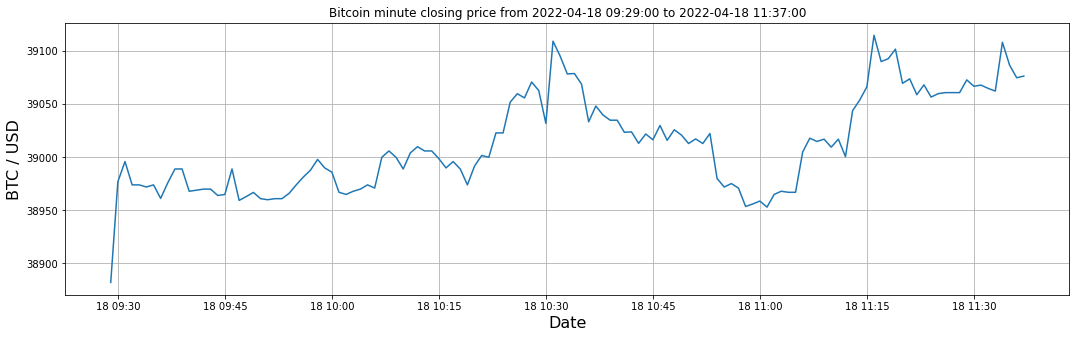

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(df['close'])
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('BTC / USD', fontsize=16)
ax.set_title('Bitcoin minute closing price from {} to {}'.format(df.index[0], df.index[-1]))
ax.grid()

plt.show()

In [17]:
btc_historical = btc_historical.append(df).drop_duplicates()
btc_historical.to_csv('btc_historical.csv')

<AxesSubplot:xlabel='time'>

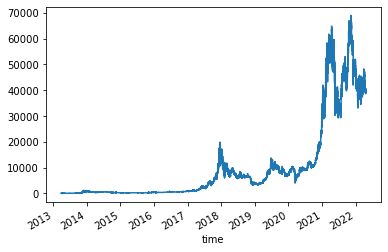

In [18]:
btc_historical["close"].plot()